In [1]:
import pandas as pd

results = pd.read_csv('C:/Users/hases/Documents/F1 Wet Race Analysis/results.csv')

races = pd.read_csv('C:/Users/hases/Documents/F1 Wet Race Analysis/races.csv')

drivers = pd.read_csv('C:/Users/hases/Documents/F1 Wet Race Analysis/drivers.csv')

df = pd.merge(results, races, how = "left", on= 'raceId')
df_1 = pd.merge(df, drivers, how = 'left', on= 'driverId')

df_1

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,time_y,url_x,driverRef,number_y,code,forename,surname,dob,nationality,url_y
0,1,18,1,1,22,1,1,1,1,10.0,...,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,18,2,2,3,5,2,2,2,8.0,...,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,18,3,3,7,7,3,3,3,6.0,...,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,18,4,4,5,11,4,4,4,5.0,...,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,18,5,1,23,3,5,5,5,4.0,...,4:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24975,24981,1052,854,210,47,18,16,16,16,0.0,...,15:00:00,https://en.wikipedia.org/wiki/2021_Bahrain_Gra...,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
24976,24982,1052,842,213,10,5,17,17,17,0.0,...,15:00:00,https://en.wikipedia.org/wiki/2021_Bahrain_Gra...,gasly,10,GAS,Pierre,Gasly,1996-02-07,French,http://en.wikipedia.org/wiki/Pierre_Gasly
24977,24983,1052,849,3,6,17,18,18,18,0.0,...,15:00:00,https://en.wikipedia.org/wiki/2021_Bahrain_Gra...,latifi,6,LAT,Nicholas,Latifi,1995-06-29,Canadian,http://en.wikipedia.org/wiki/Nicholas_Latifi
24978,24984,1052,4,214,14,9,\N,R,19,0.0,...,15:00:00,https://en.wikipedia.org/wiki/2021_Bahrain_Gra...,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso


In [2]:
pd.to_numeric(df_1["positionOrder"])

0         1
1         2
2         3
3         4
4         5
         ..
24975    16
24976    17
24977    18
24978    19
24979    20
Name: positionOrder, Length: 24980, dtype: int64

In [3]:
ham = df_1.loc[df_1['driverRef'] == "hamilton"]

In [4]:
ham['positionOrder'].mean()

4.782771535580524

In [5]:
wet_ham = ham.loc[ham['Wet'] > 0]

wet_ham['positionOrder'].mean()

4.45945945945946

In [6]:
dry_position= df_1.groupby('driverRef')['positionOrder'].mean()
dry_position

driverRef
Cannoc       14.000000
Changy       19.000000
abate        26.500000
abecassis    17.000000
acheson      24.777778
               ...    
zanardi      16.159091
zapico       27.000000
zonta        13.394737
zorzi        15.428571
zunino       15.272727
Name: positionOrder, Length: 853, dtype: float64

In [7]:
wet_df_1 = df_1[df_1['Wet'] > 0]

In [8]:
wet_position = wet_df_1.groupby('driverRef')['positionOrder'].mean()

wet_position

driverRef
abecassis     17.000000
adamich       13.000000
ader          22.000000
agabashian    28.000000
ahrens        12.000000
                ...    
wurz          12.933333
yamamoto      16.833333
zanardi       12.500000
zonta         10.400000
zunino        17.666667
Name: positionOrder, Length: 532, dtype: float64

In [9]:
driver_wet_df = pd.merge(drivers, wet_position, how = 'left', on= 'driverRef')
new_driver_wet_df = driver_wet_df.rename(columns={'positionOrder':'Wet Race Avg. Position'})

driver_df = pd.merge(new_driver_wet_df, dry_position, how= 'left', on= 'driverRef')
comp_driver_df = driver_df.rename(columns = {'positionOrder':'Race Avg. Position'})
comp_driver_df

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,Wet Race Avg. Position,Race Avg. Position
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,4.459459,4.782772
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,12.000000,10.722826
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,9.757576,8.252427
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,8.704545,8.263492
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,12.565217,13.285714
...,...,...,...,...,...,...,...,...,...,...,...
848,850,pietro_fittipaldi,51,FIT,Pietro,Fittipaldi,1996-06-25,Brazilian,http://en.wikipedia.org/wiki/Pietro_Fittipaldi,NaN,18.000000
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken,NaN,16.000000
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,NaN,9.000000
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,NaN,20.000000


In [10]:
comp_driver_df['Wet Race Performance'] = comp_driver_df['Race Avg. Position'] - comp_driver_df['Wet Race Avg. Position']

comp_driver_df

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,Wet Race Avg. Position,Race Avg. Position,Wet Race Performance
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,4.459459,4.782772,0.323312
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,12.000000,10.722826,-1.277174
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,9.757576,8.252427,-1.505149
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,8.704545,8.263492,-0.441053
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,12.565217,13.285714,0.720497
...,...,...,...,...,...,...,...,...,...,...,...,...
848,850,pietro_fittipaldi,51,FIT,Pietro,Fittipaldi,1996-06-25,Brazilian,http://en.wikipedia.org/wiki/Pietro_Fittipaldi,NaN,18.000000,NaN
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken,NaN,16.000000,NaN
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,NaN,9.000000,NaN
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin,NaN,20.000000,NaN


In [11]:
comp_driver_df.to_csv('C:/Users/hases/Documents/F1 Wet Race Analysis/comp_drivers.csv')

In [12]:
df_1.to_csv('C:/Users/hases/Documents/F1 Wet Race Analysis/all_races.csv')

In [13]:
current_df = pd.read_csv('C:/Users/hases/Documents/F1 Wet Race Analysis/current_drivers.csv')

current_df['Wet Race Performance'] = current_df['Race Avg. Position'] - current_df['Wet Race Avg. Position']

In [14]:

current_df

,Unnamed: 0,driverId,driverRef,number,code,forename,surname,dob,nationality,url,Wet Race Avg. Position,Race Avg. Position,Wet Race Performance
0,0,1,hamilton,44,HAM,Lewis,Hamilton,1/7/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,4.459459,4.782772,0.323312
1,821,822,bottas,77,BOT,Valtteri,Bottas,8/28/1989,Finnish,http://en.wikipedia.org/wiki/Valtteri_Bottas,9.214286,6.974684,-2.239602
2,829,830,max_verstappen,33,VER,Max,Verstappen,9/30/1997,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen,7.090909,7.491667,0.400758
3,814,815,perez,11,PER,Sergio,Pérez,1/26/1990,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,9.500000,10.314433,0.814433
4,844,846,norris,4,NOR,Lando,Norris,11/13/1999,British,http://en.wikipedia.org/wiki/Lando_Norris,13.000000,9.820513,-3.179487
5,816,817,ricciardo,3,RIC,Daniel,Ricciardo,7/1/1989,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo,11.250000,9.714286,-1.535714
6,842,844,leclerc,16,LEC,Charles,Leclerc,10/16/1997,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc,11.750000,9.183333,-2.566667
7,831,832,sainz,55,SAI,Carlos,Sainz,9/1/1994,Spanish,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.,7.727273,11.041667,3.314394
8,19,20,vettel,5,VET,Sebastian,Vettel,7/3/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,7.611111,6.366795,-1.244316
9,839,840,stroll,18,STR,Lance,Stroll,10/29/1998,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll,10.333333,12.569620,2.236287


Text(0.5, 1.0, 'Wet Race Performance (2021 Grid)')

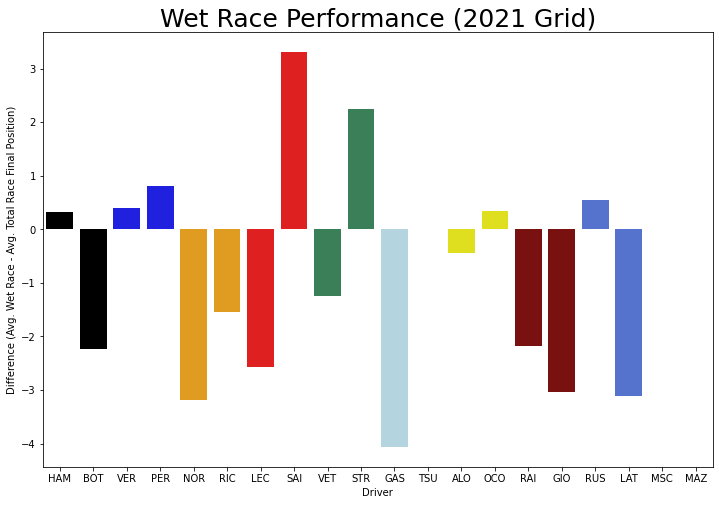

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
ax = sns.barplot(x="code", y="Wet Race Performance", data=current_df, palette={'HAM':'black', 'BOT': 'black', 'VER':'blue', 'PER':'blue', 'NOR':'orange', 'RIC':'orange', 'LEC':'red', 'SAI':'red', 'VET':'seagreen', 'STR':'seagreen', 'GAS':'lightblue', 'TSU':'lightblue', 'ALO':'yellow', 'OCO':'yellow', 'RAI':'darkred', 'GIO':'darkred', 'RUS':'royalblue', 'LAT':'royalblue', 'MSC':'black', 'MAZ':'black'})
plt.ylabel("Difference (Avg. Wet Race - Avg. Total Race Final Position)")
plt.xlabel("Driver")
plt.title("Wet Race Performance (2021 Grid)", size = 25)